## Configure sweep on 10 MW turbine with specified shear/veer rates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import numpy as np
import seaborn as sns
from wrf_io import *
from scipy.io import savemat
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [4]:
opt_params={}

opt_params['allocation']      = 'ATM170028' 
opt_params['partition']       = 'spr' 
opt_params['runtime']         = '12:00:00'
opt_params['system']          = 'stampede'
opt_params['num_nodes']       = 2
 
opt_params['exclude_time']    = 7
opt_params['save_interval']   = 10
 
opt_params['base_dir']        = '/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train'
 
opt_params['gp_dir']          = '/scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/'

opt_params['field_data_path'] = '/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/'

opt_params['wrf_path']        = '/work2/09909/smata/stampede3/WRF_LES'
opt_params['template_path']   = '/scratch/09909/smata/wrf_les_sweep/templates'
opt_params['turb_model']      = 'iea10MW'
opt_params['rotor_model']     = 'GAD'
opt_params['slice_loc']       = 1
    
opt_params['print_table']     = True
    
opt_params['plot_outer']      = True
opt_params['save_outer']      = False
opt_params['outer_align']     = False
    
opt_params['plot_inner']      = True
opt_params['save_inner']      = False
    
opt_params['save_both']       = False
opt_params['outer_pad']       = 75
 
opt_params['plot_profiles']   = True
opt_params['save_profiles']   = True
 
opt_params['batch_submit']    = True
 
opt_params['prof_type']       = 'Idealized'
opt_params['shear_type']      = 'Rate'
 
# Train 
opt_params['shear']           = [-0.025,-0.015,0,0.015,0.025]
opt_params['veer']            = [-0.2,-0.13,-0.067,0,0.067,0.13,0.2]
 
opt_params['Ufst']            = 7
 
opt_params['excluded_pairs']  = []

# with open('/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train/gad_sweep/opt_params.pkl', 'wb') as f:
#     pickle.dump(opt_params, f)

In [5]:
train_data = gpr.generate_train_data(opt_params, D=199, field_data = True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [-0.

In [6]:
veer_pallette  = sns.color_palette("RdBu", as_cmap=False, n_colors=7)
shear_pallette = sns.color_palette("PRGn", as_cmap=False, n_colors=5)

(2.0, 2.175)

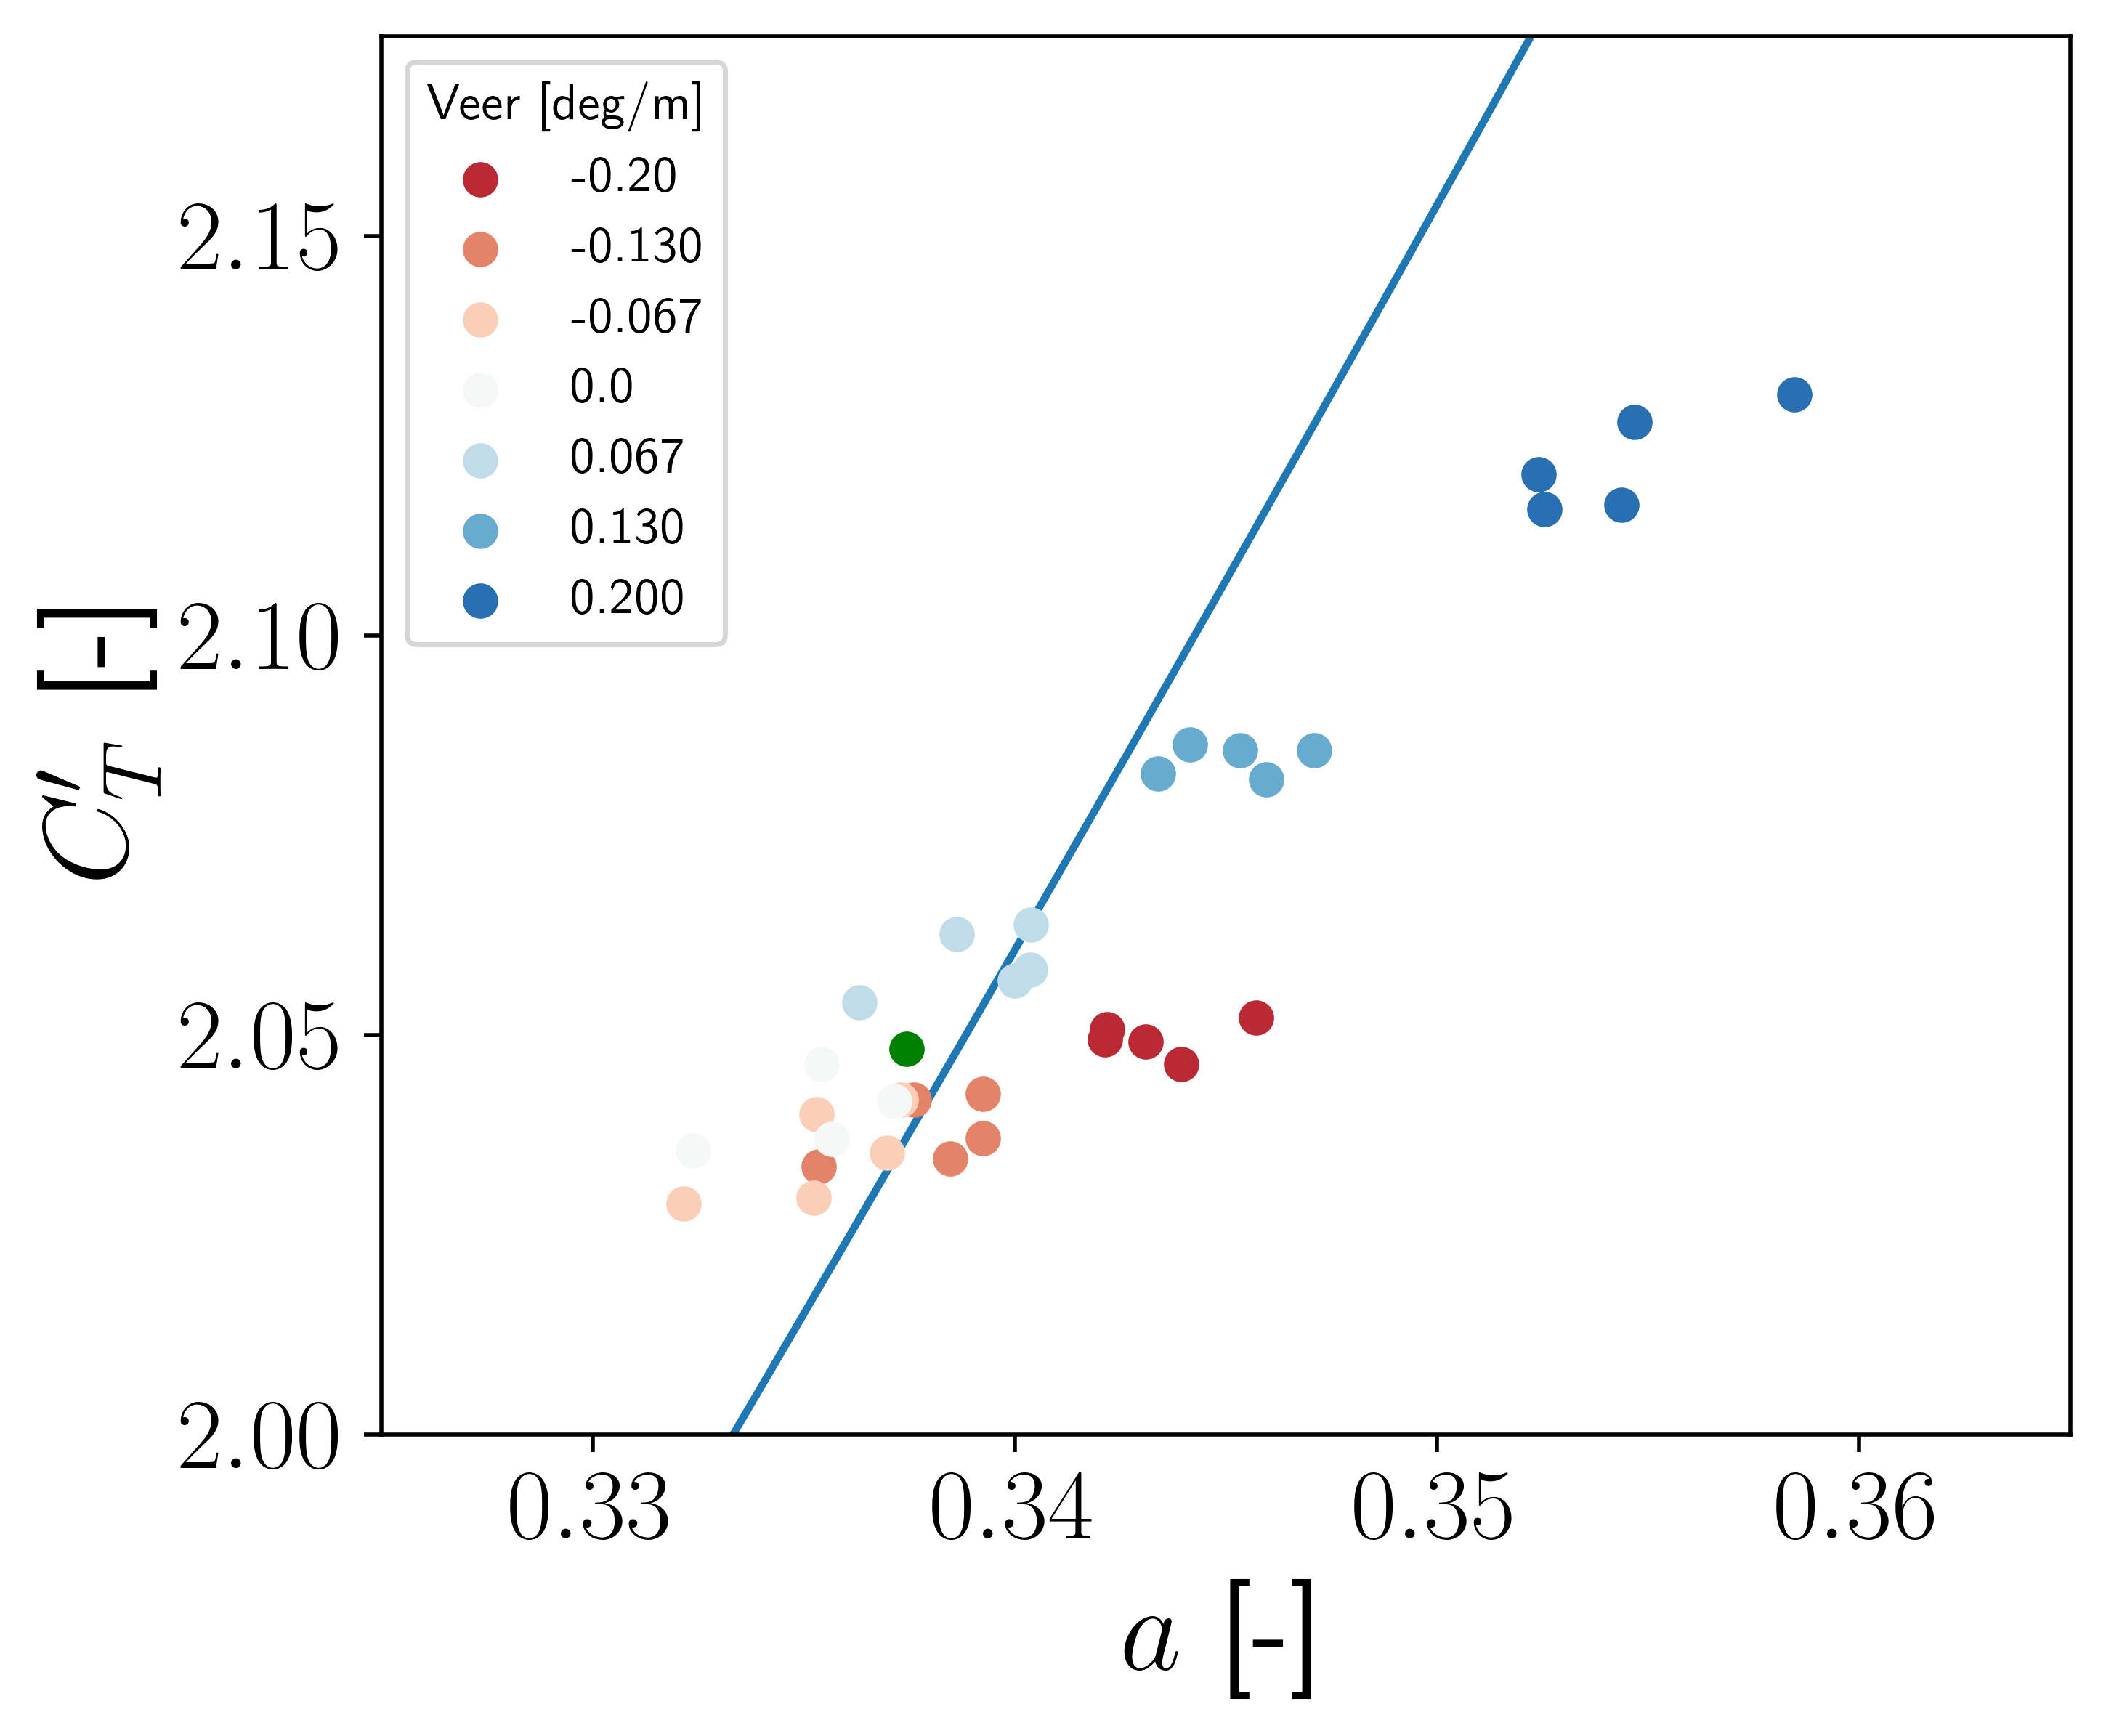

In [43]:
fig, ax = plt.subplots(figsize=(6, 5))


a = np.linspace(0.33,0.37,20)
CT_formula = 4 * a / (1 - a)

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

uniform = 17

ax.plot(a,CT_formula,zorder=1)

ax.scatter(train_data['ind_rotor'][veer_n200], train_data['cotp_rotor'][veer_n200],color=veer_pallette[0],label='-0.20')
ax.scatter(train_data['ind_rotor'][veer_n130], train_data['cotp_rotor'][veer_n130],color=veer_pallette[1],label='-0.130')
ax.scatter(train_data['ind_rotor'][veer_n067], train_data['cotp_rotor'][veer_n067],color=veer_pallette[2],label='-0.067')
ax.scatter(train_data['ind_rotor'][veer_000],  train_data['cotp_rotor'][veer_000], color=veer_pallette[3],label='0.0')
ax.scatter(train_data['ind_rotor'][veer_067],  train_data['cotp_rotor'][veer_067], color=veer_pallette[4],label='0.067')
ax.scatter(train_data['ind_rotor'][veer_130],  train_data['cotp_rotor'][veer_130], color=veer_pallette[5],label='0.130')
ax.scatter(train_data['ind_rotor'][veer_200],  train_data['cotp_rotor'][veer_200], color=veer_pallette[6],label='0.200')
ax.scatter(train_data['ind_rotor'][uniform], train_data['cotp_rotor'][uniform],color='green',label='')

ax.set_ylabel('$C_T\'$ [-]', fontsize=fontsize)
ax.set_xlabel('$a$ [-]', fontsize=fontsize)

ax.legend(title='Veer [deg/m]')

ax.set_xlim([0.325,0.365])
ax.set_ylim([2.0,2.175])

In [7]:
rotor_data = gpr.generate_train_data(opt_params, D=199, rotor_data=True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [-0.

In [8]:
gpr.print_stats(train_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |    0.90022 |    0.39981 |    0.08741 |    1.58606
ind_local            |    0.32628 |    0.12722 |   -0.03939 |    0.70199
cot_annulus          |    0.90022 |    0.39008 |    0.11246 |    1.38279
ind_annulus          |    0.32628 |    0.12190 |    0.01015 |    0.50941
cot_rotor            |    0.89344 |    0.00761 |    0.87670 |    0.90726
ind_rotor            |    0.34160 |    0.00649 |    0.33216 |    0.35847
shears_rotor         |   -0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_rotor          |   -0.00000 |    0.13244 |   -0.20000 |    0.20000
shears_annulus       |    0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_annulus        |  

In [58]:
# Compute shear regime, generate scalars, and standardize
opt_params['gp_base_path']          = '/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW'
opt_params['kernel_file']           = '/results/rotor_CTp/wrf_10MW_rot_CTp_D2_result.txt'
         
opt_params['train_data']            = '/train_data/wrf_10MW_rot_CTp.mat'
opt_params['test_data']             = '/test_data/wrf_10MW_rot_CTp.mat'

opt_params['scaler_cot_annulus']    = '/train_data/scaler_wrf_cot_ann.pkl',
opt_params['scaler_ind_annulus']    = '/train_data/scaler_wrf_ind_ann.pkl',
opt_params['scaler_cot_rotor']      = '/train_data/scaler_wrf_cot_rot.pkl',
opt_params['scaler_ind_rotor']      = '/train_data/scaler_wrf_ind_rot.pkl',
opt_params['scaler_shears_rotor']   = '/train_data/scaler_shears_rot.pkl',
opt_params['scaler_veers_rotor']    = '/train_data/scaler_veers_rot.pkl',
opt_params['scaler_shears_annulus'] = '/train_data/scaler_shears_ann.pkl',
opt_params['scaler_veers_annulus']  = '/train_data/scaler_veers_ann.pkl',
opt_params['encoder_rotor']         = '/train_data/encoder_rot.pkl',
opt_params['encoder_annulus']       = '/train_data/encoder_ann.pkl',
opt_params['scaler_cotp_rotor']     = '/train_data/scaler_wrf_cotp_rot.pkl',

scalars = gpr.load_scalars(opt_params)

In [59]:
_, gpr_kernel = postproc.build_kernel_from_search(opt_params, noise = True)

Kernel line:
ScoredKernel(k_opt=ProductKernel([ MaskKernel(ndim=3, active_dimension=1, base_kernel=RQKernel(lengthscale=0.910251, output_variance=0.212985, alpha=-1.692454)), MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=0.556557, output_variance=1.313249)) ]), nll=-13.633844, laplace_nle=nan, bic_nle=-13.046296, noise=[-4.51187185])

Noise:
-4.51187185

Kernel specification string:
ProductKernel([ MaskKernel(ndim=3, active_dimension=1, base_kernel=RQKernel(lengthscale=0.910251, output_variance=0.212985, alpha=-1.692454)), MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=0.556557, output_variance=1.313249)) ])

Kernel structure:
{'children': [{'active_dimension': 1,
               'base_kernel': {'alpha': -1.692454,
                               'lengthscale': 0.910251,
                               'type': 'rq',
                               'variance': 0.212985},
               'ndim': 3,
               'type': 'mask'},
      

In [60]:
X_train, y_train, X_test, y_test = postproc.extract_data(opt_params, transform = False)

In [61]:
gpr_kernel.fit(X_train, y_train)

GaussianProcessRegressor(kernel=MaskedKernel(1.11**2 * RationalQuadratic(alpha=0.184, length_scale=2.48), active_dims=[1]) * MaskedKernel(1.93**2 * RBF(length_scale=1.74), active_dims=[2]) + WhiteKernel(noise_level=0.011),
                         optimizer=None)

In [62]:
import pickle
import os

with open(os.path.join('/scratch/09909/smata/induction_modeling/gaussian_process/10MW/results/rotor/opr_kernel.pkl'), 'wb') as f:
    pickle.dump(gpr_kernel, f)

In [63]:
casenames = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/sweep_names.npy')
U_inf     = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/U_inf.npy')
dir_inf   = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/dir_inf.npy')
U_disk    = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/U_disk.npy')
dir_disk  = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/dir_disk.npy')
Uhub      = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/Uhub.npy')
wrf_omg   = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/wrf_omg.npy')
pitch     = np.load('/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/pitch.npy')

wrf_tsr   = 2 * np.pi / 60 * 99.5 / 7 * wrf_omg

In [64]:
indices = [14,15,16,17,18,19,20]

In [65]:
veers = np.array([-0.2,-0.13,-0.067,0.0,0.067,0.13,0.2])

In [66]:
from MITRotor import BEM, BEMGeometry, IEA10MW, NoTipLoss, WRFLESAerodynamics, NoTangentialInduction, ConstantInduction_GP_CTprime

In [67]:
rotor = IEA10MW()

gpr_ind = np.zeros_like(indices, dtype='float')
gpr_cot = np.zeros_like(indices, dtype='float')
gpr_thr = np.zeros_like(indices, dtype='float')
gpr_cop = np.zeros_like(indices, dtype='float')
gpr_pow = np.zeros_like(indices, dtype='float')
iters   = np.zeros_like(indices, dtype='float')

Nelm = 30
Nsct = 160

for count in range(len(gpr_ind)):

    index = indices[count]

    bem = BEM(rotor=rotor, geometry=BEMGeometry(Nr=Nelm,Ntheta=Nsct,R=rotor.R, Rhub = rotor.hub_radius), aerodynamic_model=WRFLESAerodynamics(), tiploss_model=NoTipLoss(), momentum_model=ConstantInduction_GP_CTprime(veer = veers[count]), tangential_induction_model=NoTangentialInduction())

    sol = bem(pitch[index], wrf_tsr[index], 0, v_inf = Uhub[index], U = U_inf[:,:,index]/Uhub[index], wdir=dir_inf[:,:,index], veer = veers[count])

    gpr_cot[count] = sol.Ct()
    gpr_thr[count] = sol.thrust()/1e3
    gpr_pow[count] = sol.power()/1e6
    gpr_cop[count] = sol.Cp()
    gpr_ind[count] = sol.a()
    iters[count]   = sol.niter
    
iters

array([3., 3., 4., 4., 3., 3., 3.])

In [68]:
gpr_ind

array([0.34315321, 0.33930985, 0.33732013, 0.3374742 , 0.34032133,
       0.34528974, 0.35253342])

In [69]:
train_data['ind_rotor'][indices]

array([0.34310291, 0.3392515 , 0.33729761, 0.33744342, 0.34038427,
       0.34533207, 0.35254878])

In [24]:
gpr_cot

array([0.89734957, 0.89609249, 0.89423842, 0.89193577, 0.88976545,
       0.88825958, 0.88851589])

In [28]:
pitch[14]

np.float64(0.023691274225711823)

In [51]:
X_train, y_train, X_test, y_test = postproc.extract_data(opt_params, transform = False)

gpr_kernel.fit(X_train, y_train)

GaussianProcessRegressor(kernel=MaskedKernel(1.47**2 * RBF(length_scale=47.8), active_dims=[0]) * MaskedKernel(3.5**2 * RationalQuadratic(alpha=1.43e-05, length_scale=192), active_dims=[1]) * MaskedKernel(1.35**2 * RationalQuadratic(alpha=0.0104, length_scale=112), active_dims=[2]) + WhiteKernel(noise_level=0.000586),
                         optimizer=None)

In [52]:
# X_t_rot = scalars['scaler_cot_rotor'].inverse_transform(X_train[:,0].reshape(-1, 1)).ravel()
# y_t_rot = scalars['scaler_ind_rotor'].inverse_transform(y_train.reshape(-1, 1)).ravel()
# A_pred = gpr_kernel.predict(X_train, return_std=False)

X_t_rot = scalars['scaler_cot_rotor'].inverse_transform(X_test[:,0].reshape(-1, 1)).ravel()
y_t_rot = scalars['scaler_ind_rotor'].inverse_transform(y_test.reshape(-1, 1)).ravel()
A_pred = gpr_kernel.predict(X_test, return_std=False)

A_pred = scalars['scaler_ind_rotor'].inverse_transform(A_pred.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_t_rot, A_pred))

rmse

np.float64(0.0003598501618489925)

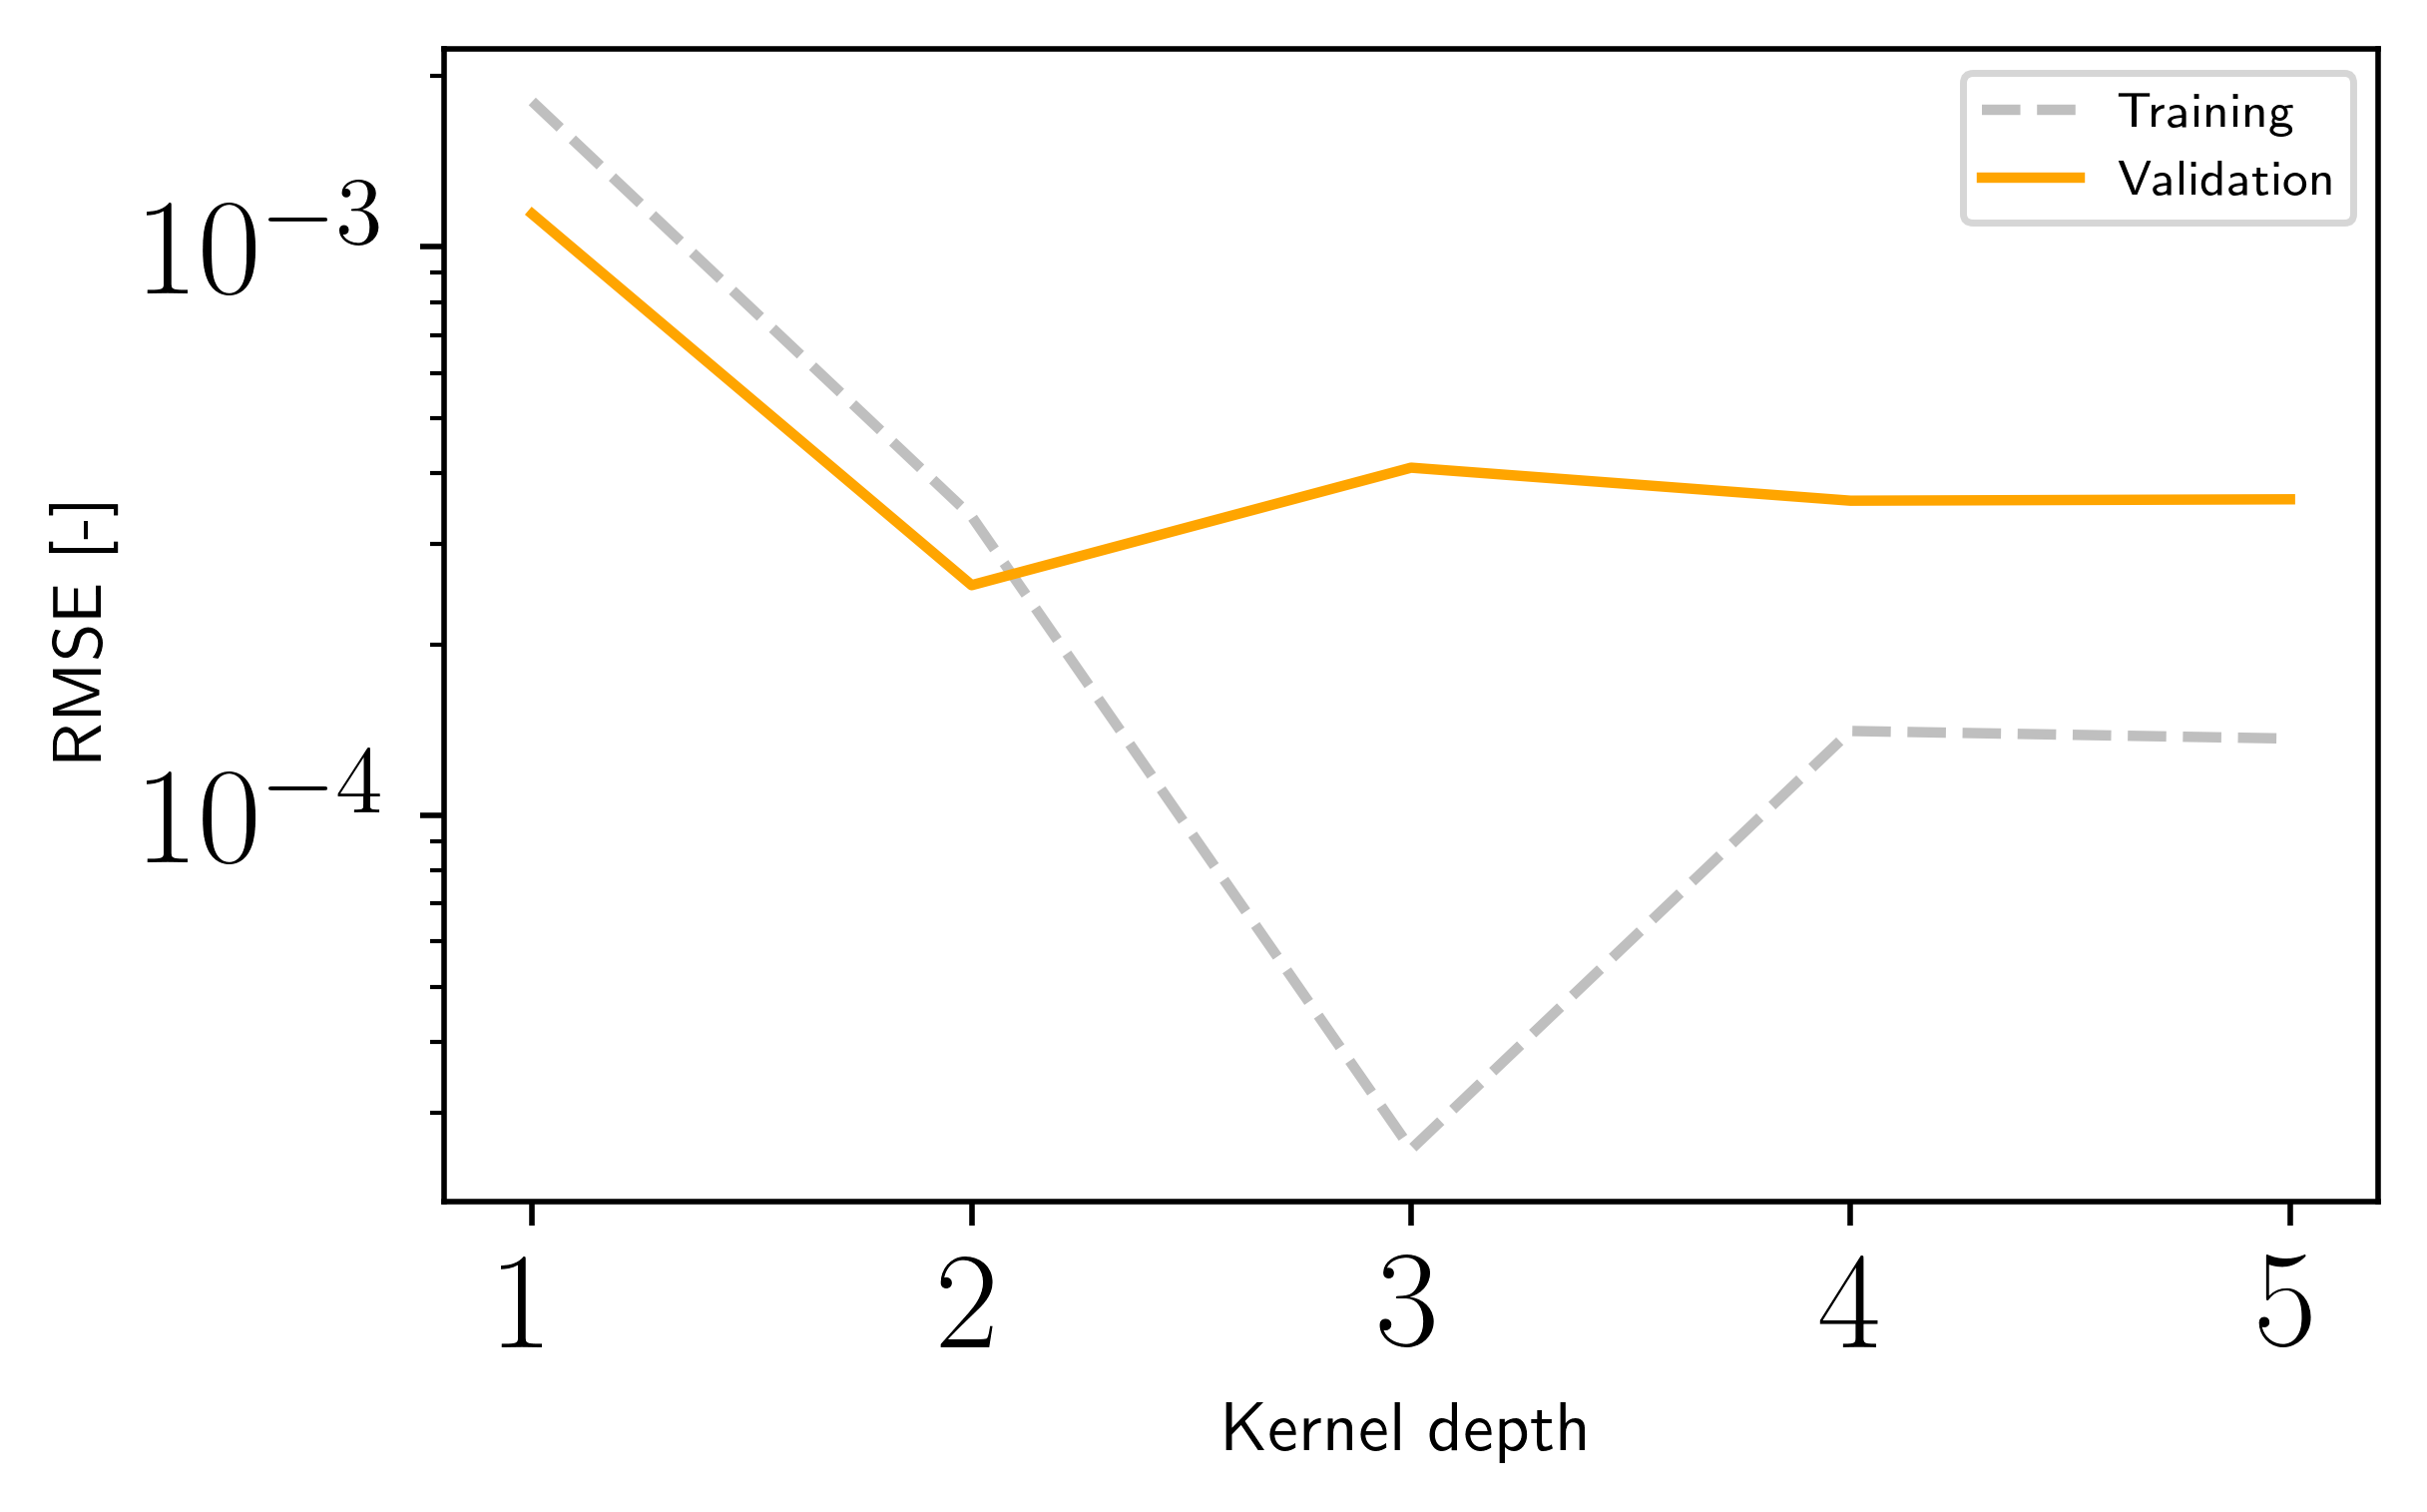

In [53]:
fig, ax = plt.subplots(figsize=(5, 3))

train    = [0.001802761751796299, 0.00033574940317412146, 2.5870841957569495e-05, 0.00014080412920723764, 0.00013654864751824975]
validate = [0.0011424834768670943, 0.00025414787634468706, 0.00040901557054824107, 0.0003578103634012965, 0.0003598501618489925]

depth = [1, 2, 3, 4, 5] 

ax.semilogy(depth,train,linestyle='--',color='grey',label='Training',alpha=0.5)
ax.semilogy(depth,validate,color='orange',label='Validation')

ax.set_ylabel('RMSE [-]')
ax.set_xlabel('Kernel depth')

ax.set_xticks(depth)

ax.legend(fontsize = 7)
plt.show()